**Quantitaive Analysis**

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import talib as ta

In [38]:
#Stock data source path

AAPL_path=r'C:\Users\hp\Nova-Solutions-News-Sentiment-Price-Forecasts\data\yfinance_data\AAPL_historical_data.csv'
AMZN_path=r'C:\Users\hp\Nova-Solutions-News-Sentiment-Price-Forecasts\data\yfinance_data\AMZN_historical_data.csv'
GOOG_path=r'C:\Users\hp\Nova-Solutions-News-Sentiment-Price-Forecasts\data\yfinance_data\GOOG_historical_data.csv'
META_path=r'C:\Users\hp\Nova-Solutions-News-Sentiment-Price-Forecasts\data\yfinance_data\META_historical_data.csv'
MSFT_path=r'C:\Users\hp\Nova-Solutions-News-Sentiment-Price-Forecasts\data\yfinance_data\MSFT_historical_data.csv'
NVDA_path=r'C:\Users\hp\Nova-Solutions-News-Sentiment-Price-Forecasts\data\yfinance_data\NVDA_historical_data.csv'
TSLA_path=r'C:\Users\hp\Nova-Solutions-News-Sentiment-Price-Forecasts\data\yfinance_data\TSLA_historical_data.csv'

#Loading Stock data from csv
try:
    AAPL_df = pd.read_csv(AAPL_path)
    print(f"Data loaded successfully from AAPL")
    AMZN_df = pd.read_csv(AMZN_path)
    print(f"Data loaded successfully from AMZN")
    GOOG_df = pd.read_csv(GOOG_path)
    print(f"Data loaded successfully from GOOG")
    META_df = pd.read_csv(META_path)
    print(f"Data loaded successfully from META")
    MSFT_df = pd.read_csv(MSFT_path)
    print(f"Data loaded successfully from MSFT")
    NVDA_df = pd.read_csv(NVDA_path)
    print(f"Data loaded successfully from NVDA")
    TSLA_df = pd.read_csv(TSLA_path)
    print(f"Data loaded successfully from TSLA")
except FileNotFoundError:
    print(f"Error: The file AAPL_path was not found. Please check the path.")
    print(f"Error: The file AMZN_path was not found. Please check the path.")
    print(f"Error: The file GOOG_path was not found. Please check the path.")
    print(f"Error: The file META_path was not found. Please check the path.")
    print(f"Error: The file MSFT_path was not found. Please check the path.")
    print(f"Error: The file NVDA_path was not found. Please check the path.")
    print(f"Error: The file TSLA_path was not found. Please check the path.")

Data loaded successfully from AAPL
Data loaded successfully from AMZN
Data loaded successfully from GOOG
Data loaded successfully from META
Data loaded successfully from MSFT
Data loaded successfully from NVDA
Data loaded successfully from TSLA


**Date preparation**

In [39]:

AAPL_df['Date']=pd.to_datetime(AAPL_df['Date'])            
AAPL_df.set_index('Date', inplace=True)                #setting Date column as an index
AMZN_df['Date']=pd.to_datetime(AMZN_df['Date'])
AMZN_df.set_index('Date', inplace=True)
GOOG_df['Date']=pd.to_datetime(GOOG_df['Date'])
GOOG_df.set_index('Date', inplace=True)
META_df['Date']=pd.to_datetime(META_df['Date'])
META_df.set_index('Date', inplace=True)
MSFT_df['Date']=pd.to_datetime(MSFT_df['Date'])
MSFT_df.set_index('Date', inplace=True)
NVDA_df['Date']=pd.to_datetime(NVDA_df['Date'])
NVDA_df.set_index('Date', inplace=True)
TSLA_df['Date']=pd.to_datetime(TSLA_df['Date'])
TSLA_df.set_index('Date', inplace=True)

In [40]:
#Drop blank values
NVDA_df.dropna(inplace=True)
TSLA_df.dropna(inplace=True)
MSFT_df.dropna(inplace=True)
META_df.dropna(inplace=True)
GOOG_df.dropna(inplace=True)
AMZN_df.dropna(inplace=True)
AAPL_df.dropna(inplace=True)

**Technical Analysis**

In [41]:
stock_data = {
     "AAPL": AAPL_df,
     "AMZN": AMZN_df,
     "MSFT":MSFT_df,
     "TSLA":TSLA_df,
     "META":META_df,
     "NVDA":NVDA_df,
     "GOOG":GOOG_df,
                   }

for ticker, df in stock_data.items():
    df['SMA_20'] = ta.SMA(df['Close'], timeperiod=20)
    df['RSI_14'] = ta.RSI(df['Close'], timeperiod=14)
    df['MACD'], df['MACD_Signal'], df['MACD_Hist'] = ta.MACD(
        df['Close'],
        fastperiod=12,
        slowperiod=26,
        signalperiod=9)
    df['Daily_Return'] = df['Close'].pct_change()
    print(f"Finished Computing Technical Indicators for {ticker}")
 # Re-assign the modified DataFrame back to the dictionary
    stock_data[ticker] = df
df

Finished Computing Technical Indicators for AAPL
Finished Computing Technical Indicators for AMZN
Finished Computing Technical Indicators for MSFT
Finished Computing Technical Indicators for TSLA
Finished Computing Technical Indicators for META
Finished Computing Technical Indicators for NVDA
Finished Computing Technical Indicators for GOOG


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_20,RSI_14,MACD,MACD_Signal,MACD_Hist,Daily_Return
Date,,,,,,,,,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.496292,897427216,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.694573,458857488,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.079430
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.721690,366857939,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.010064
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.608991,306396159,0.0,0.0,NaN,NaN,NaN,NaN,NaN,-0.041408
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.637103,184645512,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.010775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-24,175.389999,177.949997,173.570007,174.369995,174.369995,31250700,0.0,0.0,185.500001,37.434718,-0.034166,1.571016,-1.605182,-0.050272
2024-07-25,174.250000,175.199997,169.050003,169.160004,169.160004,28967900,0.0,0.0,184.689501,32.279082,-1.106693,1.035474,-2.142167,-0.029879
2024-07-26,168.770004,169.839996,165.865005,168.679993,168.679993,25150100,0.0,0.0,183.780501,31.843937,-1.972672,0.433845,-2.406517,-0.002838



--- Generating Visualizations for all stocks ---

Generating plots for AAPL...
  Skipping Price/SMA plot for AAPL: Insufficient data or indicators.


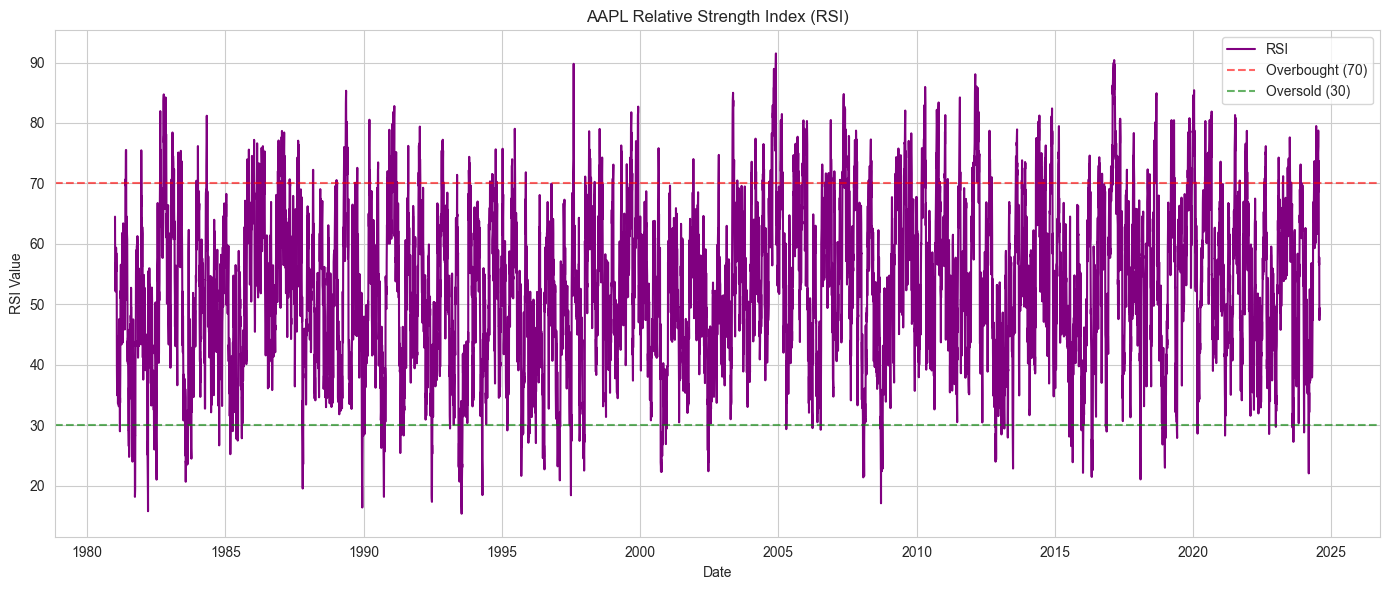

C:\Users\hp\AppData\Local\Temp\ipykernel_10948\3953575463.py:73: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\hp\Nova-Solutions-News-Sentiment-Price-Forecasts\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


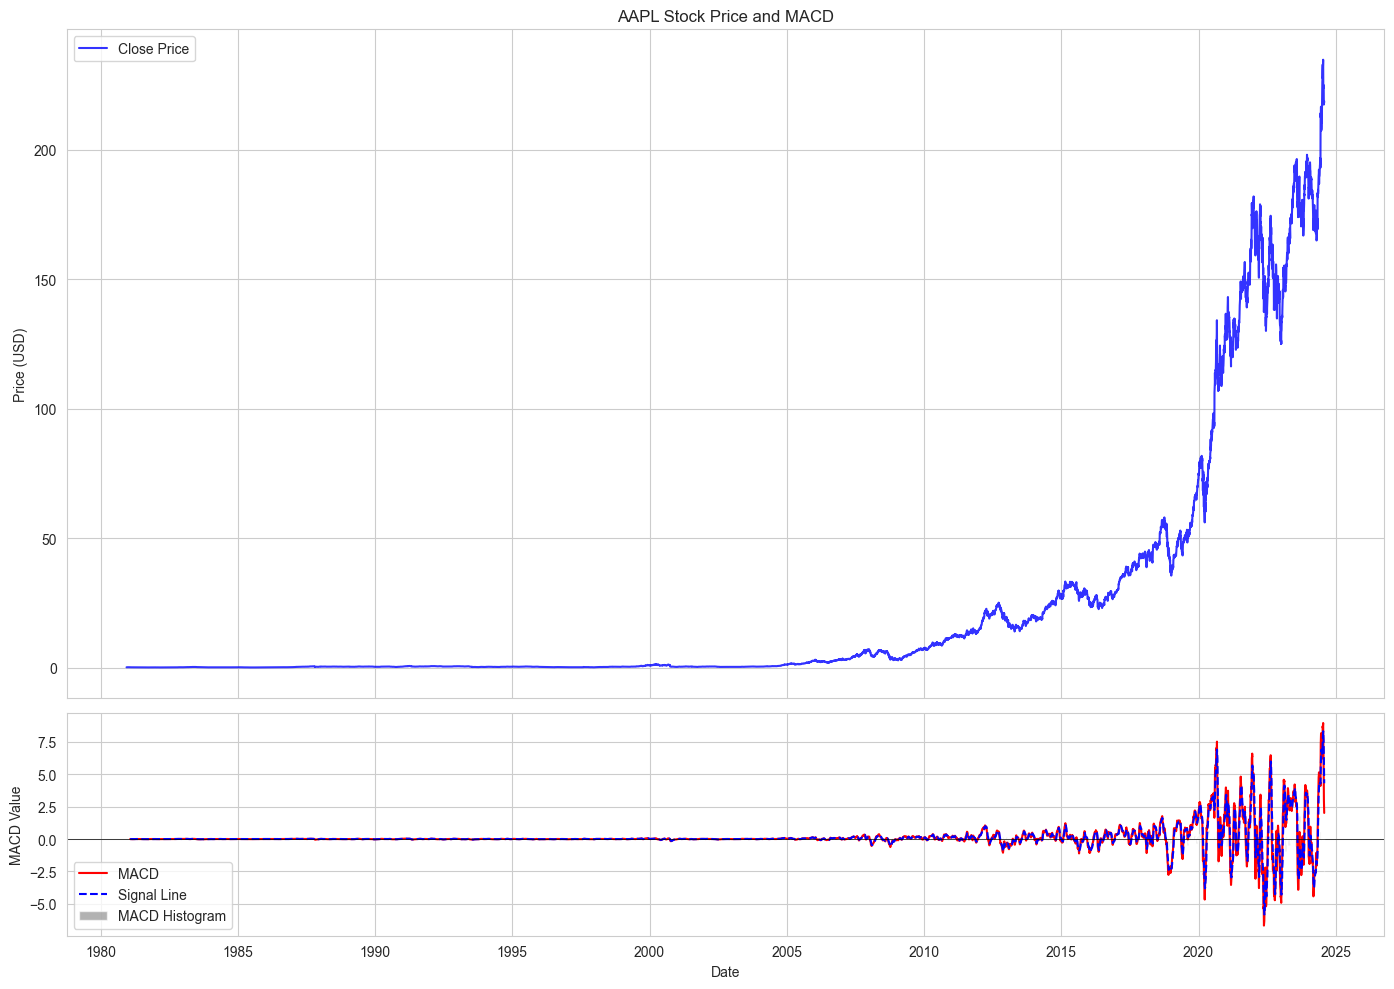

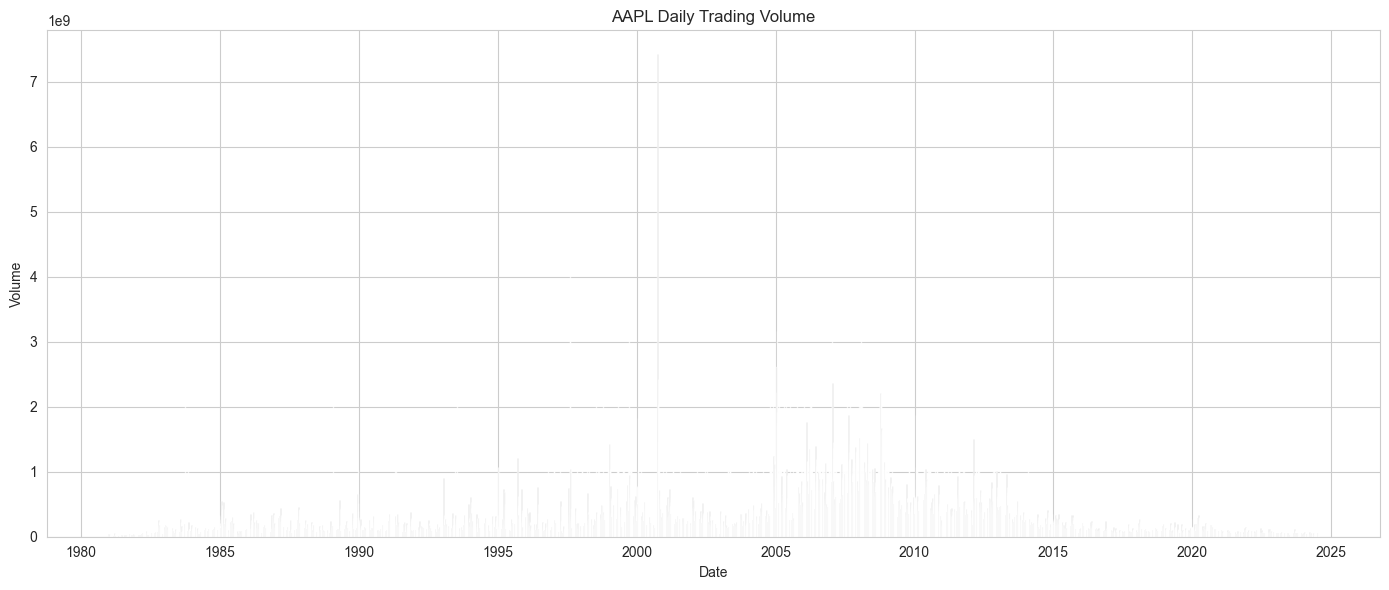

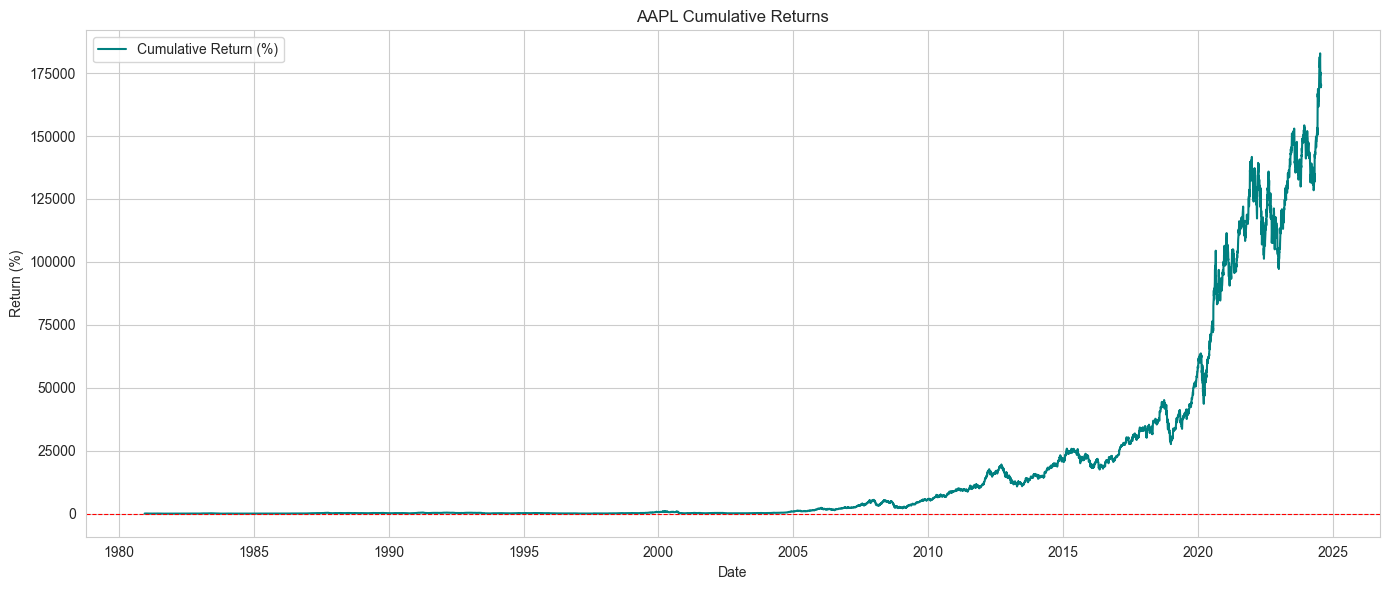

Finished generating plots for AAPL.

Generating plots for AMZN...
  Skipping Price/SMA plot for AMZN: Insufficient data or indicators.


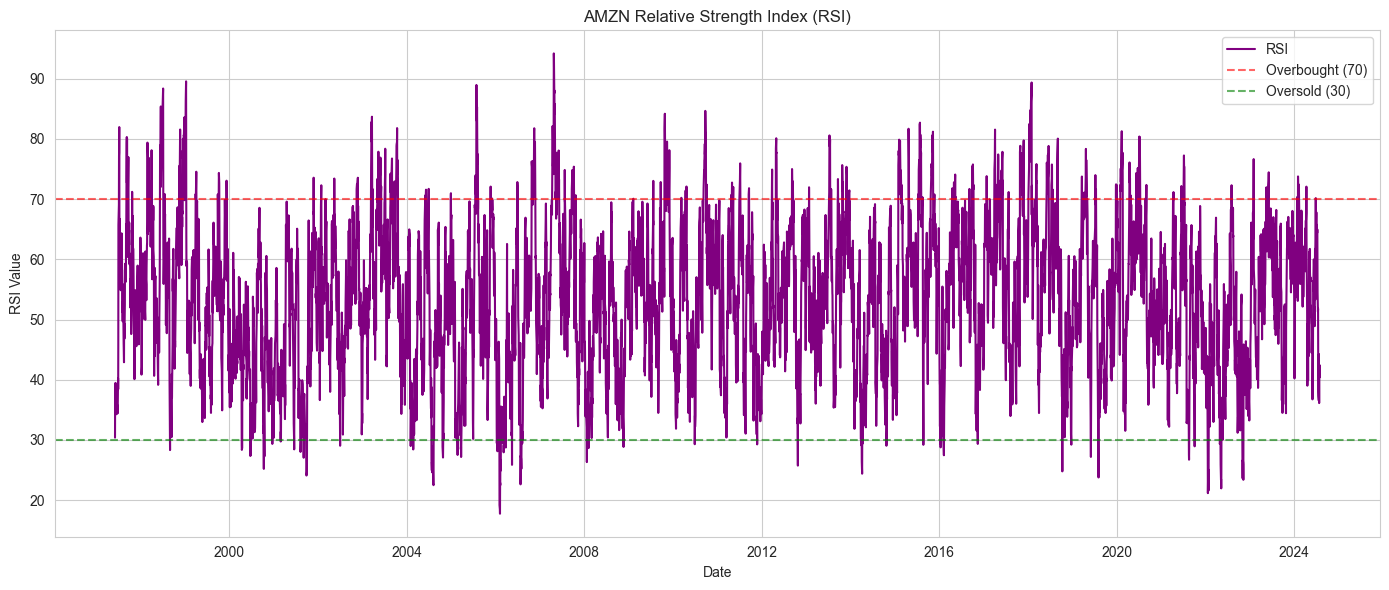

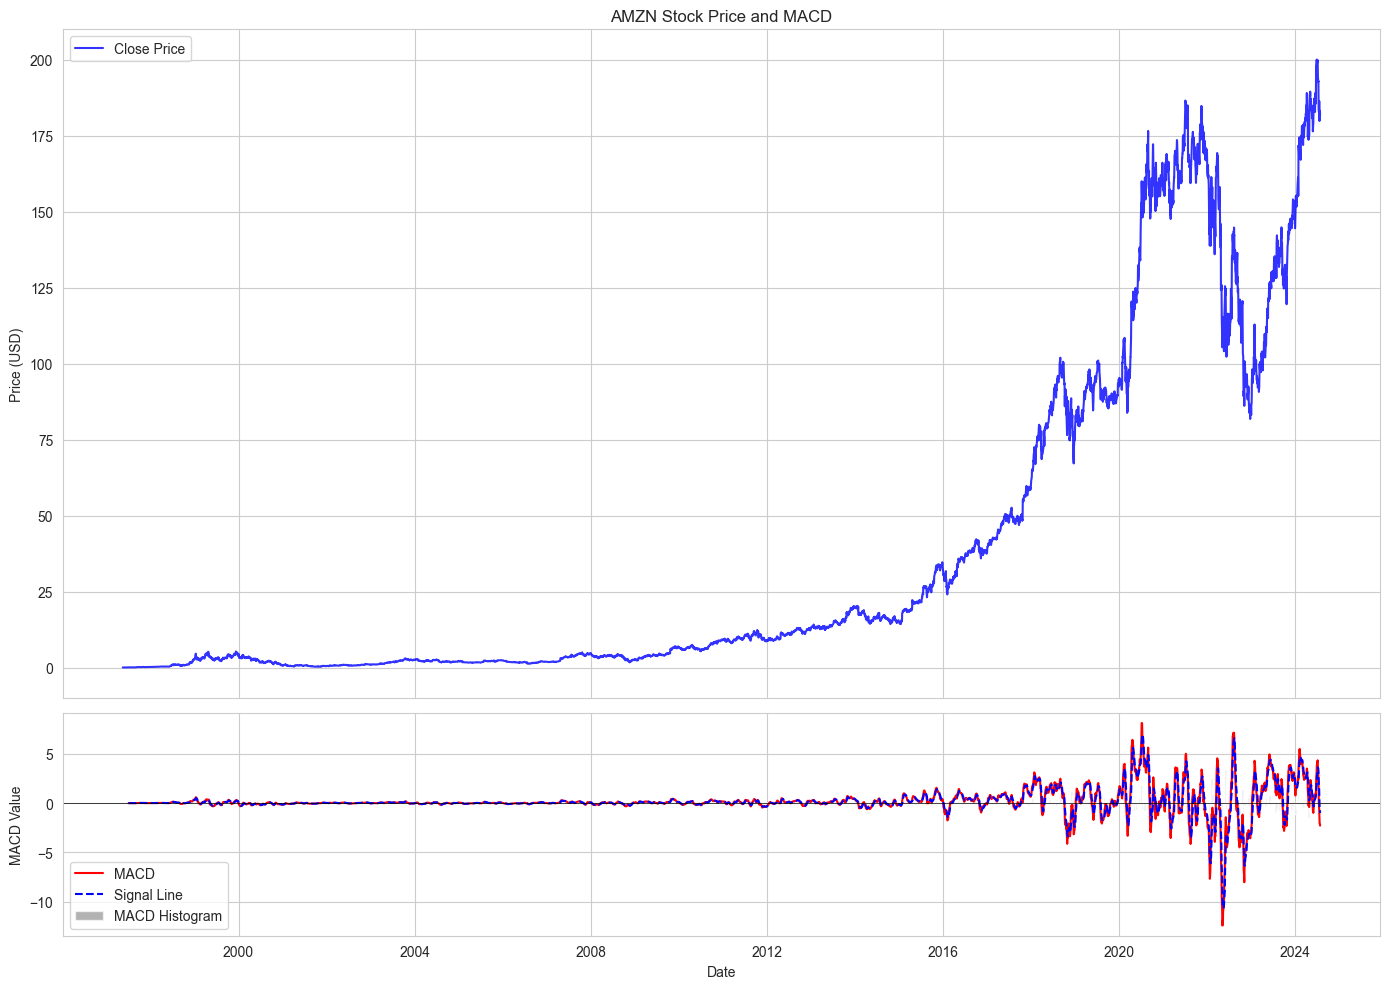

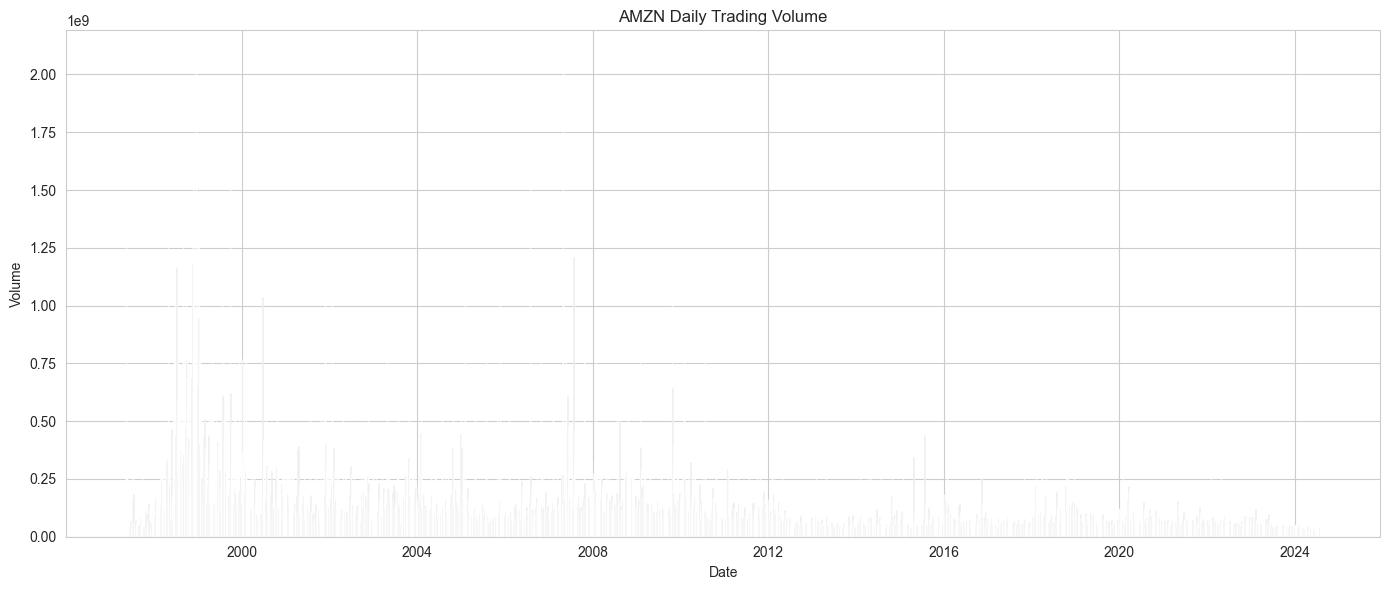

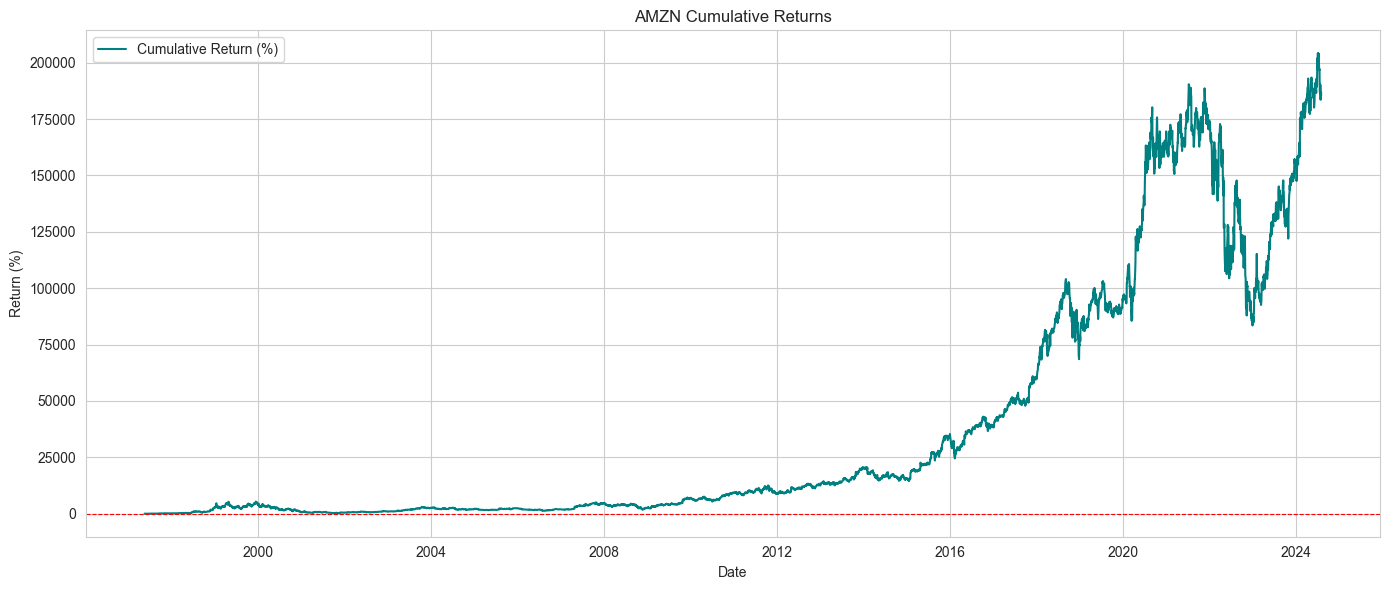

Finished generating plots for AMZN.

Generating plots for MSFT...
  Skipping Price/SMA plot for MSFT: Insufficient data or indicators.


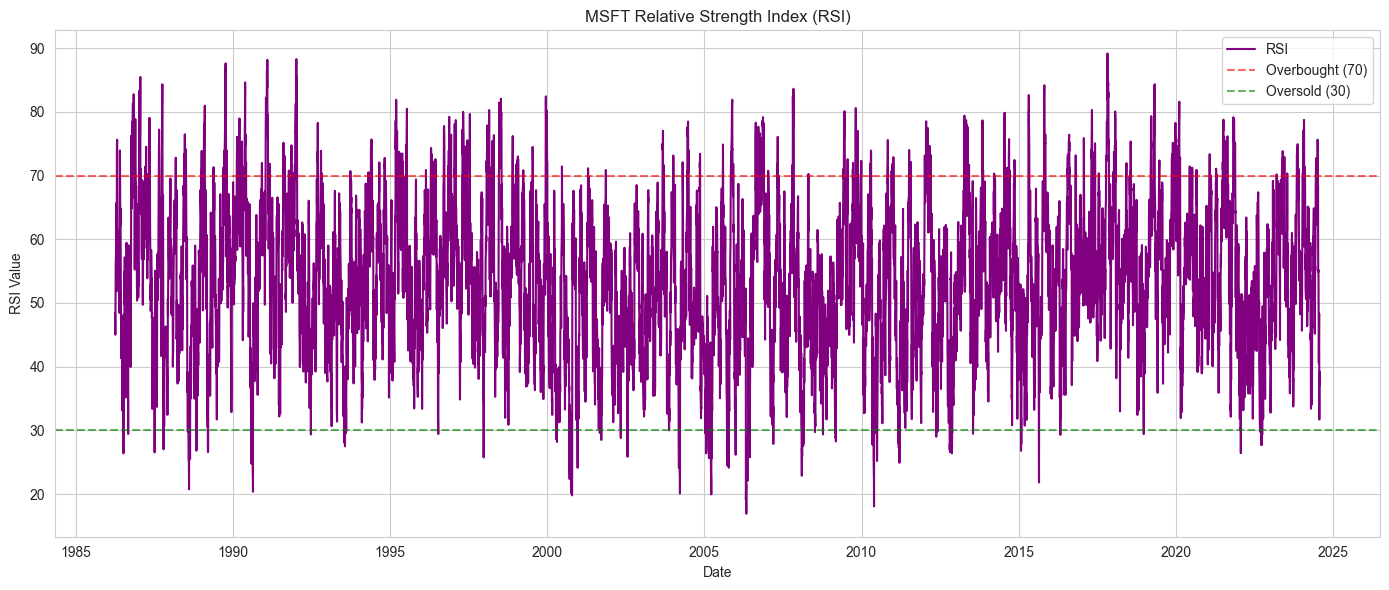

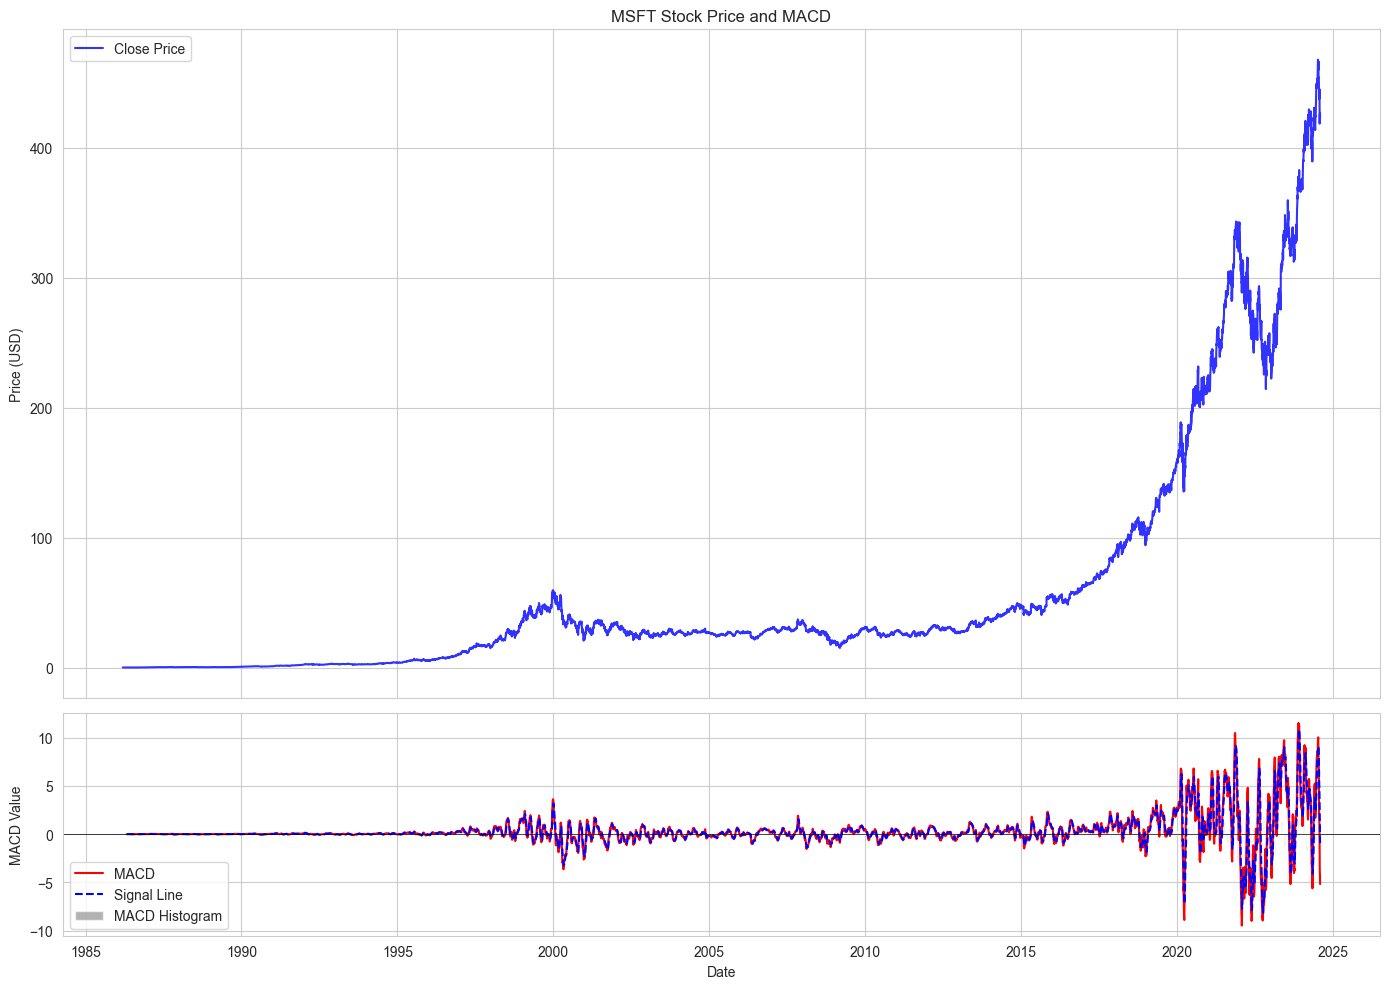

KeyboardInterrupt: 

In [ ]:
print("\n--- Generating Visualizations for all stocks ---")

# --- Define Plotting Functions ---

def plot_price_with_mas(df, ticker_symbol):
    """Plots stock close price with 20-day and 50-day Simple Moving Averages.""
    plt.figure(figsize=(14, 8))
    plt.plot(df['Close'], label='Close Price', color='blue', alpha=0.8)
    plt.plot(df['SMA_20'], label='20-day SMA', color='orange', linestyle='--')
    plt.title(f'{ticker_symbol} Stock Price with Moving Averages')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_rsi(df, ticker_symbol):
    """Plots Relative Strength Index (RSI) with overbought/oversold levels."""
    plt.figure(figsize=(14, 6))
    plt.plot(df['RSI14'], label='RSI', color='purple')
    plt.axhline(70, linestyle='--', color='red', alpha=0.6, label='Overbought (70)')
    plt.axhline(30, linestyle='--', color='green', alpha=0.6, label='Oversold (30)')
    plt.title(f'{ticker_symbol} Relative Strength Index (RSI)')
    plt.xlabel('Date')
    plt.ylabel('RSI Value')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_macd(df, ticker_symbol):
    """Plots MACD, Signal Line, and MACD Histogram."""
    if df.empty or 'MACD' not in df.columns or 'MACD_Signal' not in df.columns or 'MACD_Hist' not in df.columns:
        print(f"  Skipping MACD plot for {ticker_symbol}: Insufficient data or indicators.")
        return

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True, gridspec_kw={'height_ratios': [3, 1]})

    # Main Price Chart (optional, but good for context with MACD)
    ax1.plot(df['Close'], label='Close Price', color='blue', alpha=0.8)
    ax1.set_ylabel('Price (USD)')
    ax1.set_title(f'{ticker_symbol} Stock Price and MACD')
    ax1.legend()
    ax1.grid(True)

    # MACD Subplot
    ax2.plot(df['MACD'], label='MACD', color='red')
    ax2.plot(df['MACD_Signal'], label='Signal Line', color='blue', linestyle='--')
    # Bar plot for MACD Histogram needs to align with dates properly
    ax2.bar(df.index, df['MACD_Hist'], label='MACD Histogram', color='gray', alpha=0.6)
    ax2.axhline(0, color='black', linewidth=0.5) # Zero line for MACD histogram
    ax2.set_xlabel('Date')
    ax2.set_ylabel('MACD Value')
    ax2.legend()
    ax2.grid(True)
    plt.tight_layout()
    plt.show()

def plot_volume(df, ticker_symbol):
    """Plots daily trading volume."""
    if df.empty or 'Volume' not in df.columns:
        print(f"  Skipping Volume plot for {ticker_symbol}: Insufficient data.")
        return

    plt.figure(figsize=(14, 6))
    plt.bar(df.index, df['Volume'], color='gray', alpha=0.7)
    plt.title(f'{ticker_symbol} Daily Trading Volume')
    plt.xlabel('Date')
    plt.ylabel('Volume')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_cumulative_returns(df, ticker_symbol):
    """Plots the cumulative percentage returns."""
    if df.empty or 'Cumulative_Return' not in df.columns:
        print(f"  Skipping Cumulative Returns plot for {ticker_symbol}: Insufficient data.")
        return

    plt.figure(figsize=(14, 6))
    plt.plot(df['Cumulative_Return'] * 100, label='Cumulative Return (%)', color='teal')
    plt.axhline(0, color='red', linestyle='--', linewidth=0.8)
    plt.title(f'{ticker_symbol} Cumulative Returns')
    plt.xlabel('Date')
    plt.ylabel('Return (%)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# --- Loop through all loaded stocks and generate plots ---
for ticker, df in stock_data.items():
    if df.empty:
        print(f"No plots generated for {ticker} as data is empty after processing.")
        continue
    
    print(f"\nGenerating plots for {ticker}...")
    plot_price_with_mas(df, ticker)
    plot_rsi(df, ticker)
    plot_macd(df, ticker)
    plot_volume(df, ticker)
    plot_cumulative_returns(df, ticker)
    print(f"Finished generating plots for {ticker}.")

print("\n--- All financial metrics calculated and visualizations generated ---")
print("You should now see a series of plots pop up for each stock.")